PRACTICA 1: DECISION TREE

In [ ]:
                                        DIA 1 

PASO 1: carga conjunto de datos 

In [1]:
import seaborn as sns

#import seaborn as sns
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

print (total_data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


PASO 2: EXPLORACIÓN Y LIMPIEZA DE DATOS 

sumarizamos con shape e info

In [2]:
total_data.shape

(768, 9)

In [3]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


todas las variables numéricas, ningun valor nulo 

vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

veamos si hay duplicados 

In [4]:
total_data.duplicated().sum()
duplicados = total_data[total_data.duplicated(keep=False)]
print(duplicados)


Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [5]:
total_data.duplicated().sum()

0

prefiero no eliminar columnas 

PASO 3: ANALISIS VARIABLES UNIVARIANTE 

histplot y boxplot 

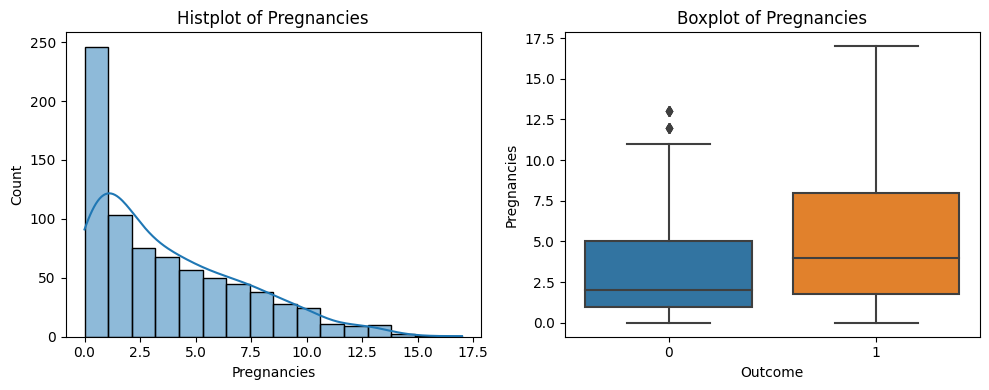

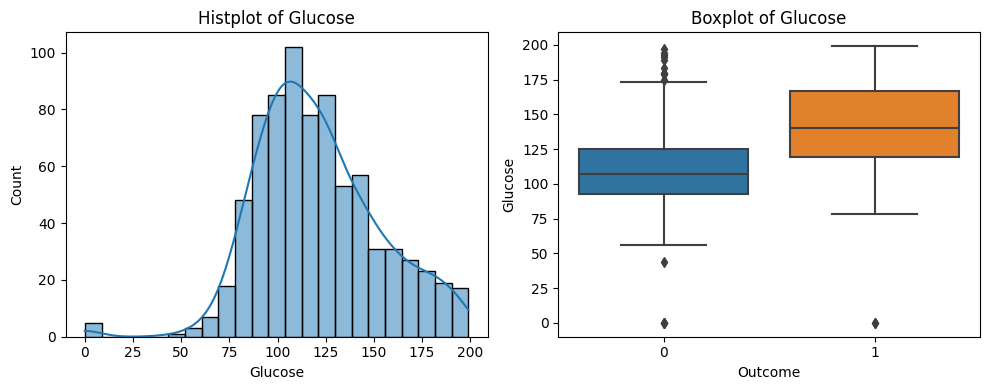

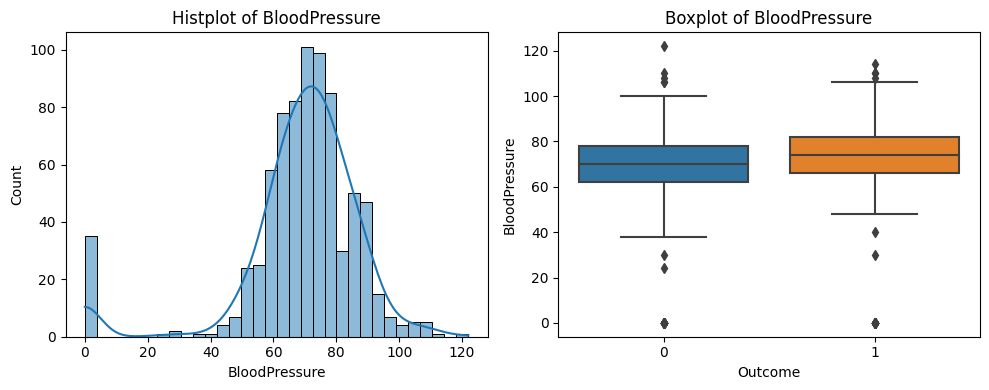

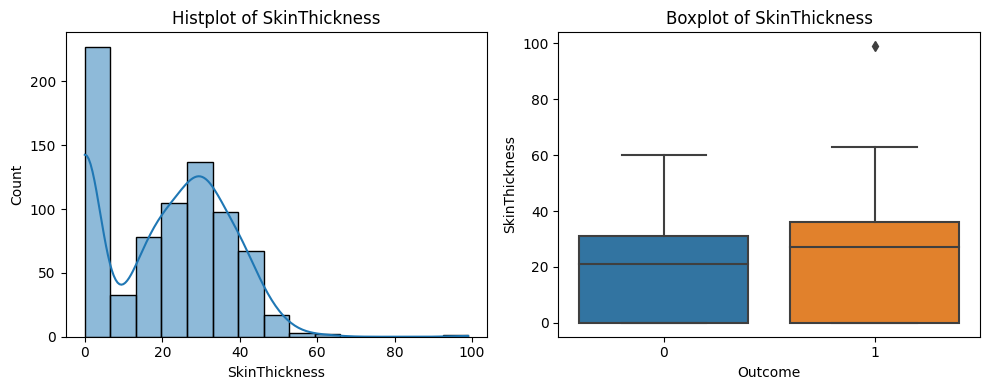

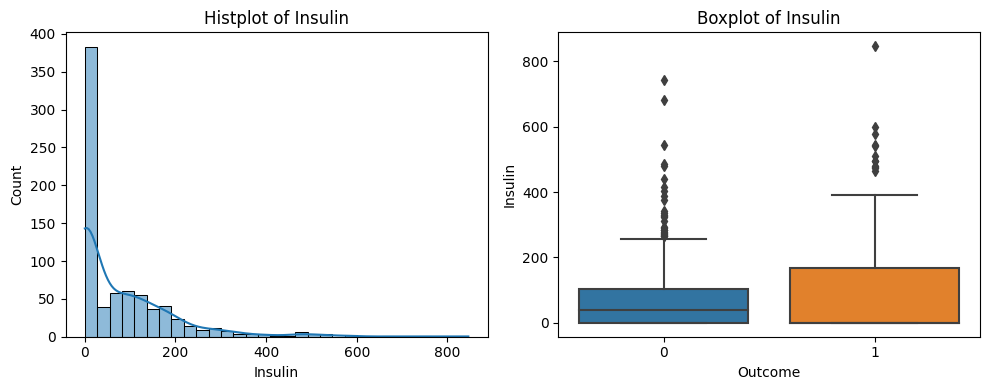

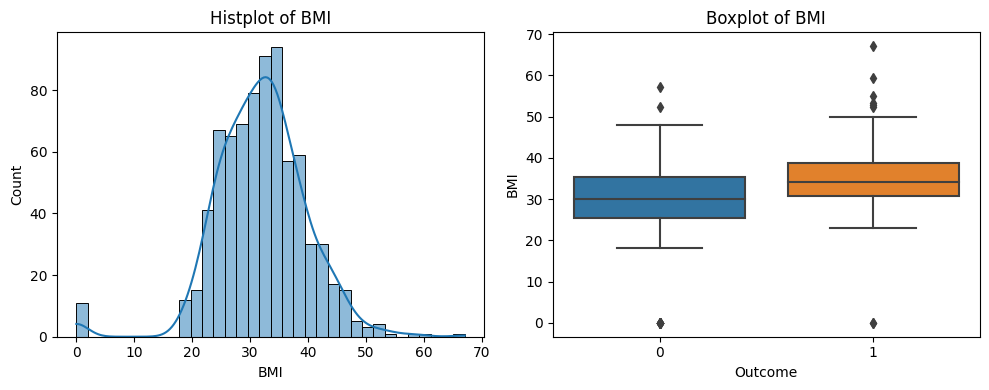

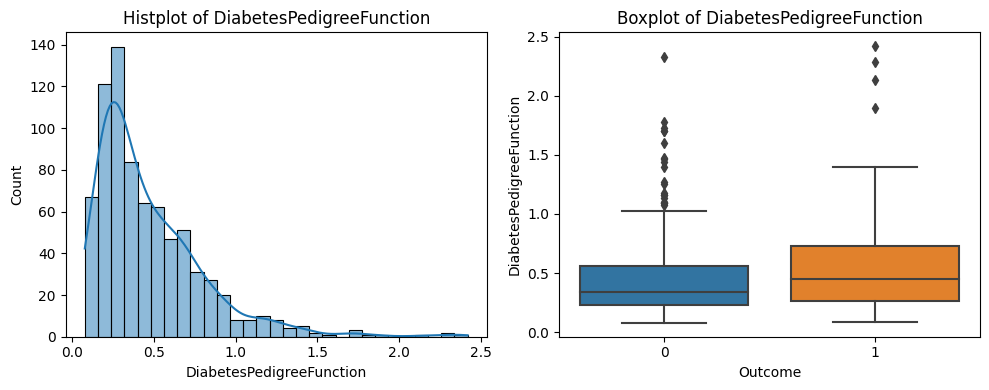

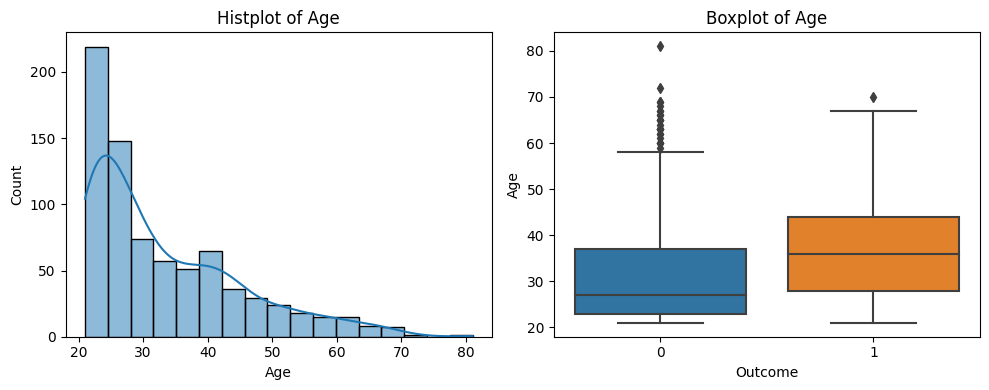

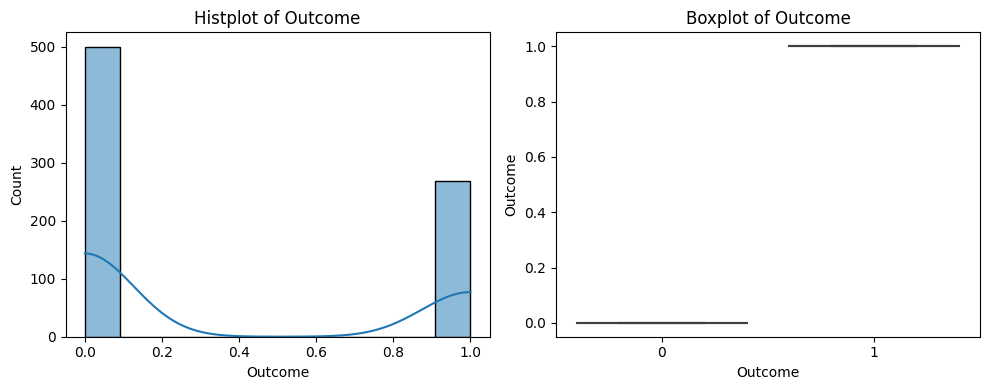

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables to plot
variables_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                     'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Create histplot and boxplot for each variable
for variable in variables_to_plot:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data=total_data, x=variable, kde=True)
    plt.title(f"Histplot of {variable}")
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=total_data, x='Outcome', y=variable)
    plt.title(f"Boxplot of {variable}")
    
    plt.tight_layout()
    plt.show()


PASO 4 ANALISIS DE VARIABLES MULTIVARIANTE 

ANALISIS NUMERICO NUMERICO 

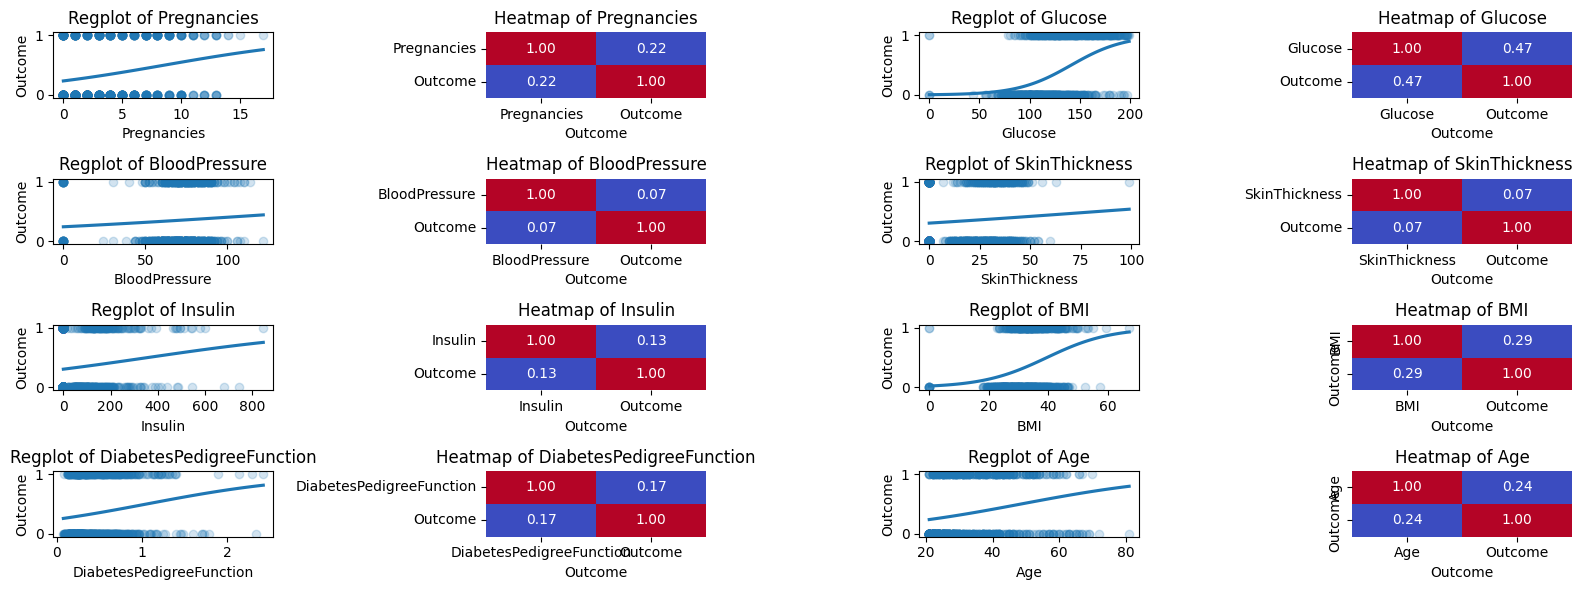

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features to plot
features_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                    'BMI', 'DiabetesPedigreeFunction', 'Age']

# Calculate the number of rows and columns for the subplots
num_features = len(features_to_plot)
num_cols = 2
num_rows = (num_features + 1) // num_cols  # Add 1 and perform integer division to handle odd number of features

# Create regplot and heatmap for each feature
plt.figure(figsize=(16, 6))
for i, feature in enumerate(features_to_plot):
    plt.subplot(num_rows, num_cols * 2, i * 2 + 1)
    sns.regplot(data=total_data, x=feature, y='Outcome', logistic=True, ci=None, scatter_kws={'alpha': 0.2})
    plt.title(f'Regplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Outcome')

    plt.subplot(num_rows, num_cols * 2, i * 2 + 2)
    correlation_data = total_data[[feature, 'Outcome']].corr()
    sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
    plt.title(f'Heatmap of {feature}')
    plt.xlabel('Outcome')

plt.tight_layout()
plt.show()


la glucosa es la variabla con mas interrelacion 

ANALISIS DE CORRELACIONES

factorizamos las variables categóricas. 

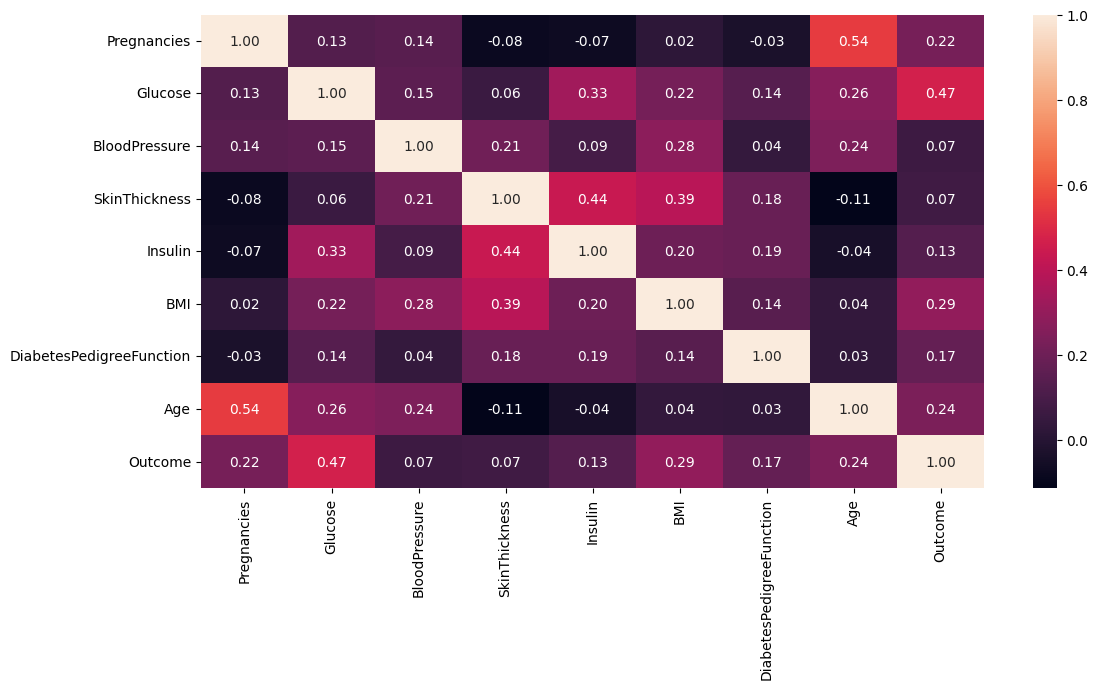

In [8]:
fig, axis = plt.subplots(figsize = (12, 7))

sns.heatmap(total_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                     'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

hago pairplot 

/home/vscode/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


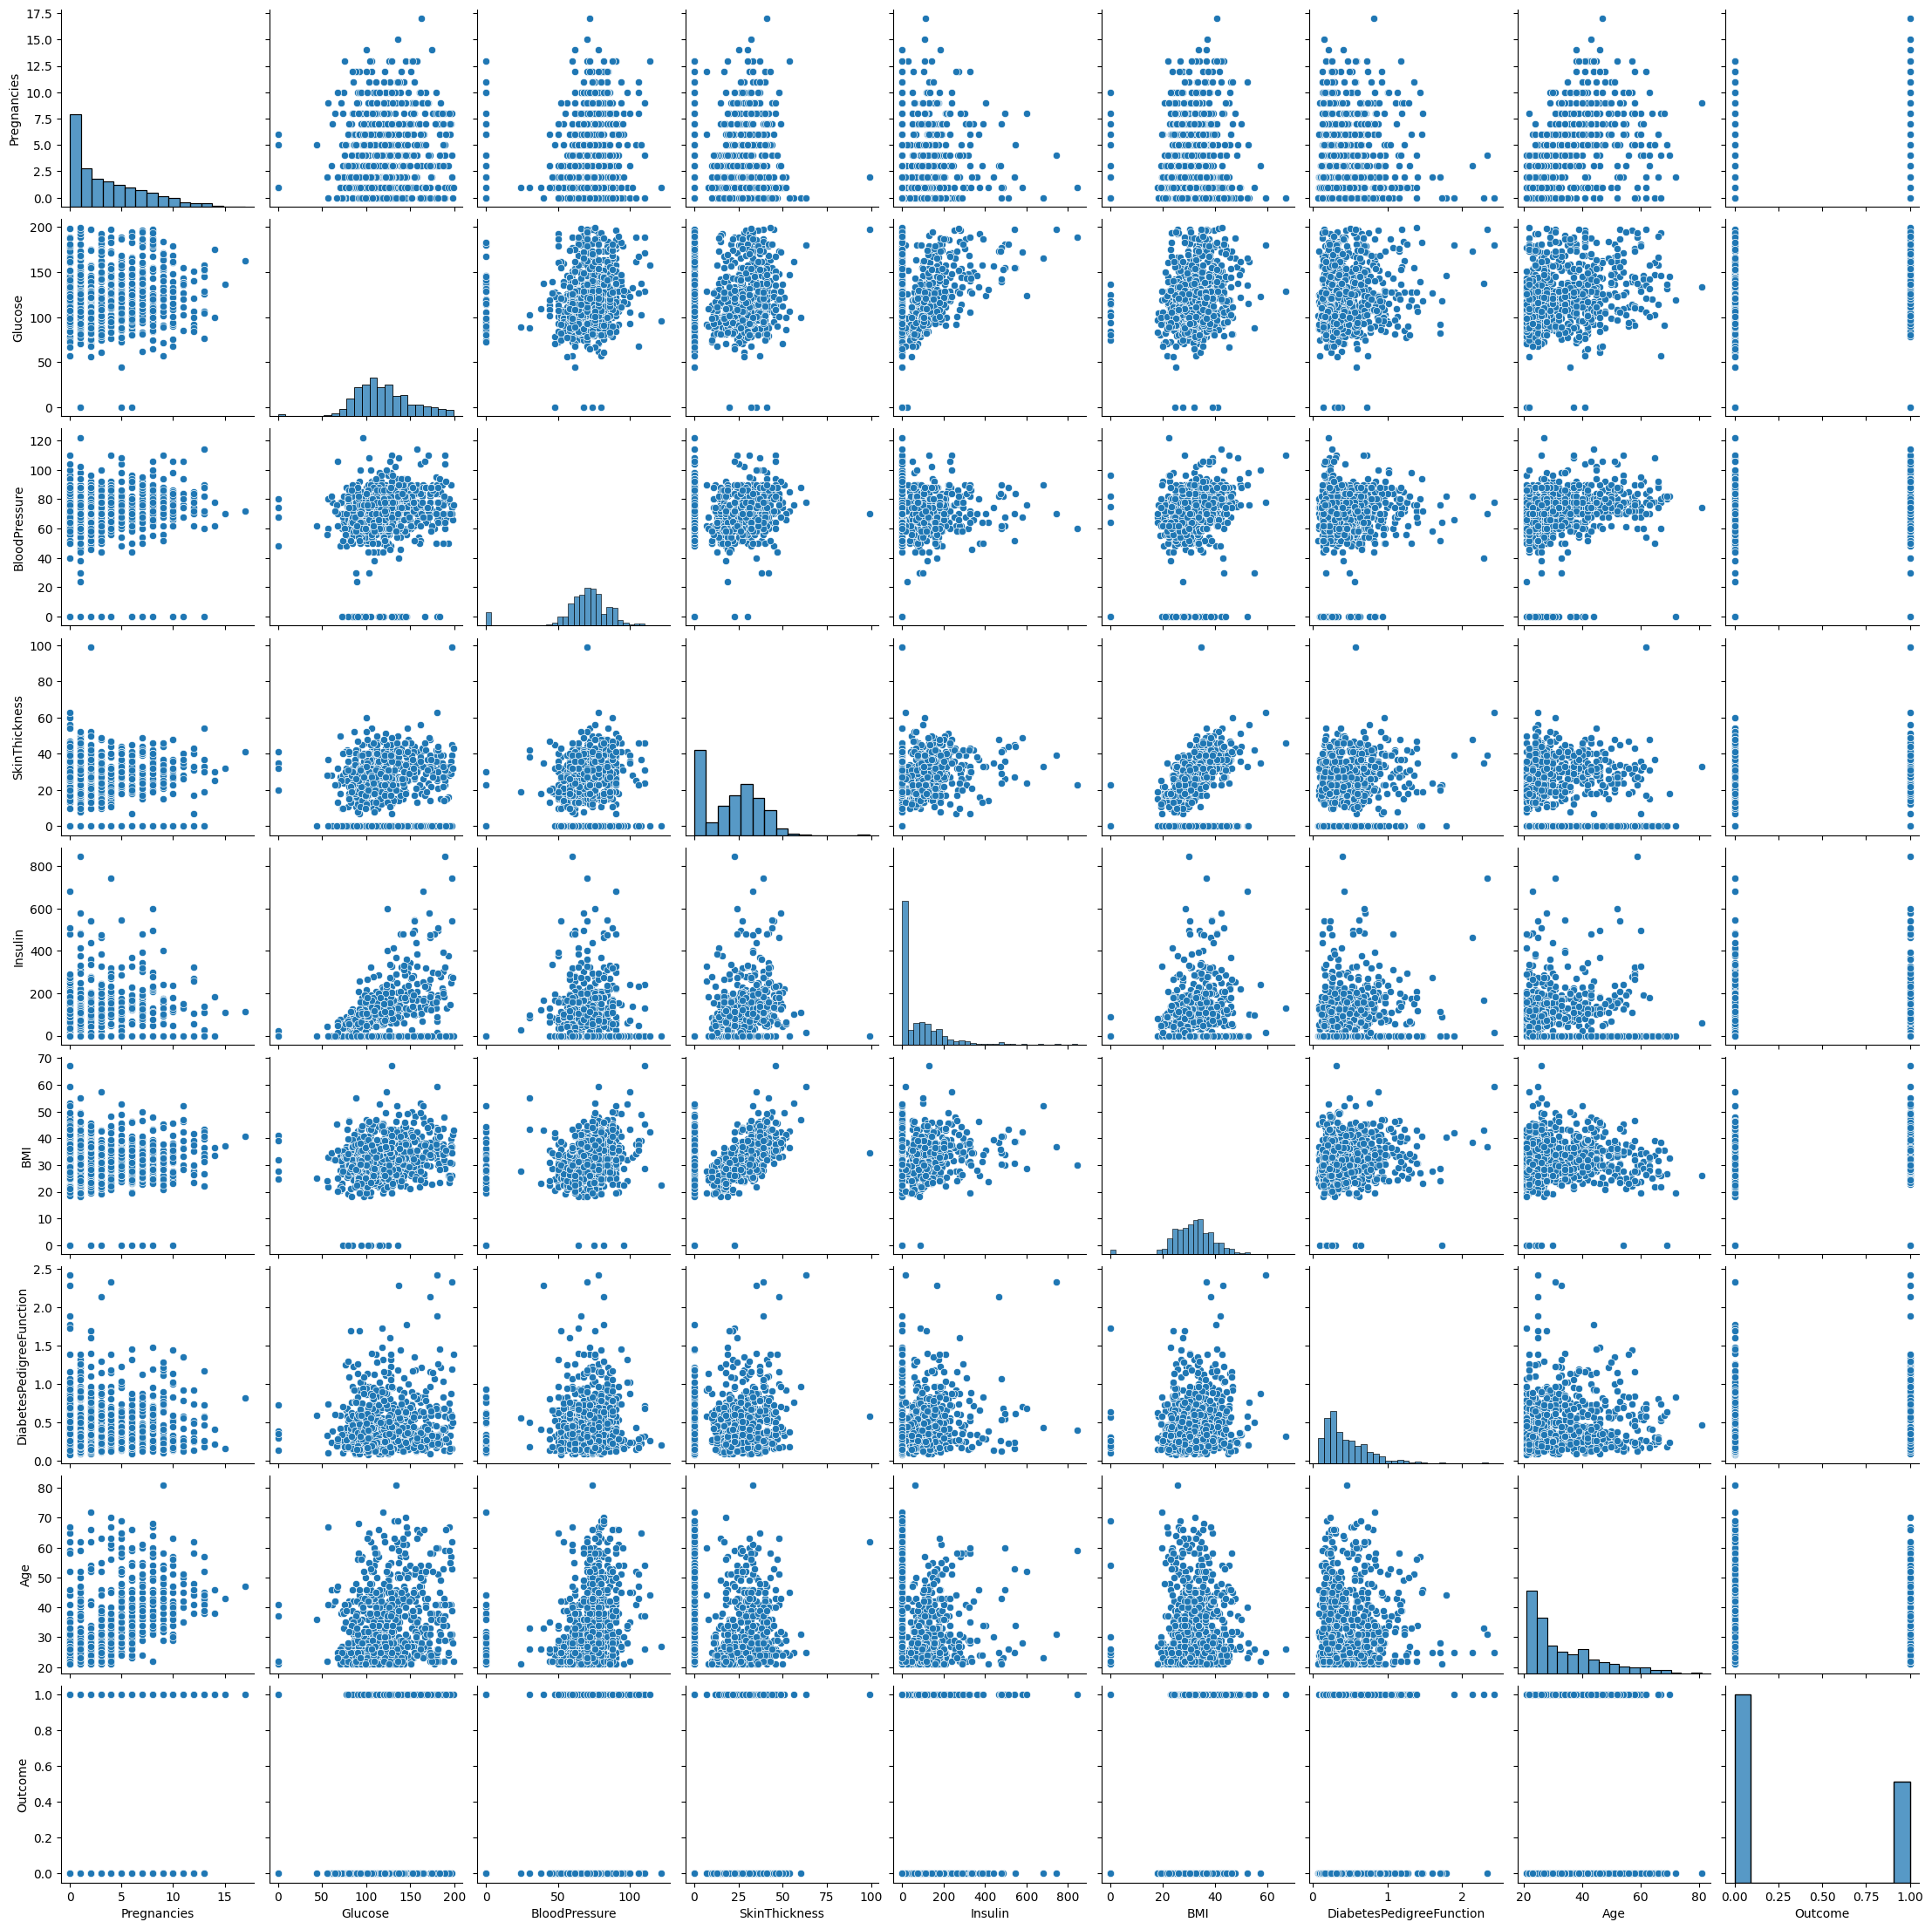

In [9]:
sns.pairplot(data= total_data)

DIA 2 FEATURE ENGENIERING 

analizar outliers 

In [10]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


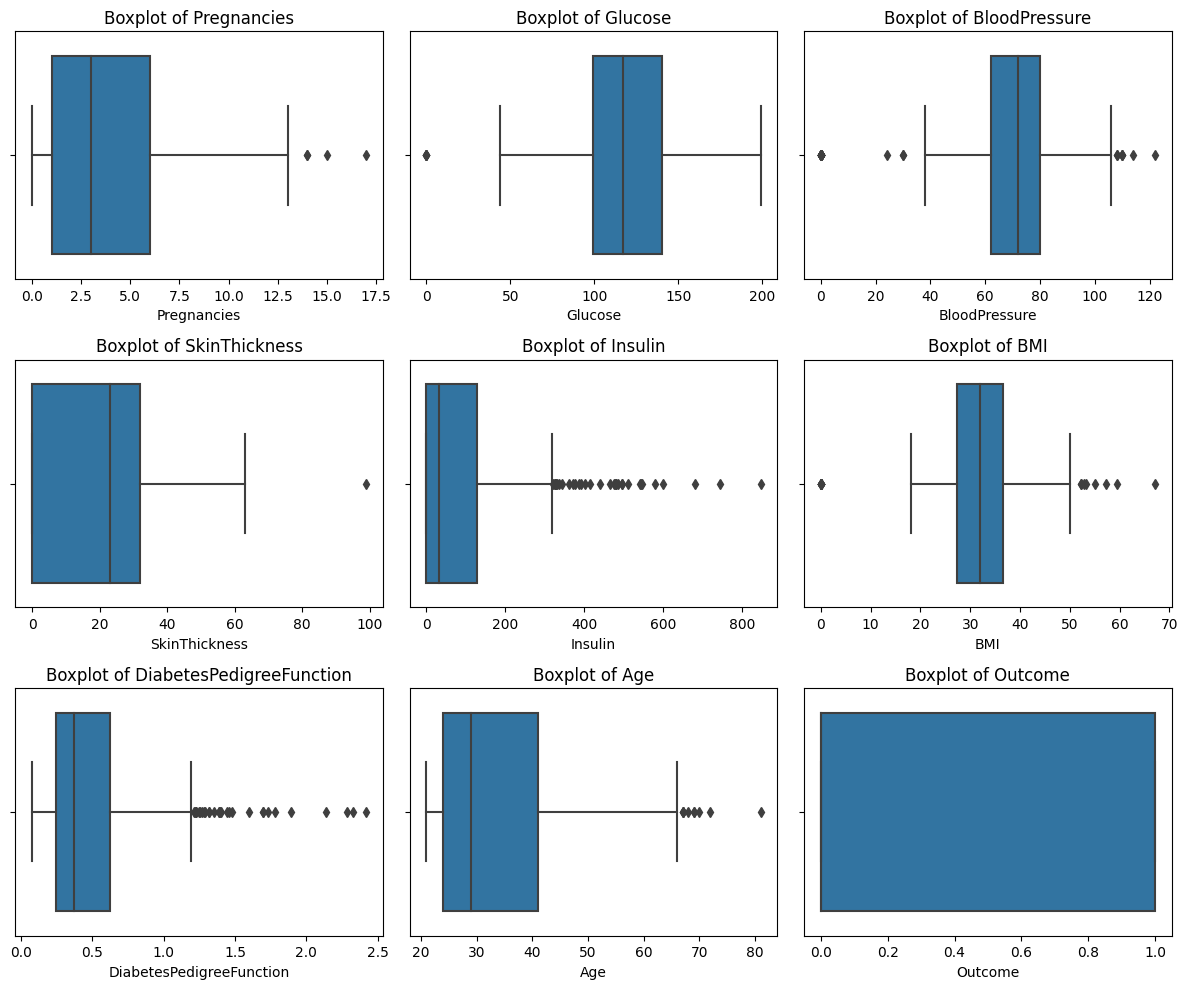

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features to plot
features_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Create boxplot for each feature
plt.figure(figsize=(12, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=total_data, x=feature)
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


vamos a ver como se comporta 

ANALISIS DE VALORES FALTANTES 

In [12]:
total_data.isnull()
total_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

no hay valores nulos 

ESCALADO DE VALORES

In [13]:
total_data_num = total_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]


from sklearn.preprocessing import MinMaxScaler

In [15]:
from sklearn.preprocessing import MinMaxScaler
norm_model = MinMaxScaler()

predict_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                    'BMI', 'DiabetesPedigreeFunction', 'Age']
#####MUY IMPORTANTE NO SE NORMALIZA LA TARGET
total_data_norm = norm_model.fit_transform(total_data_num[predict_variables])
total_data_norm = pd.DataFrame(total_data_norm, index = total_data_num.index, columns = predict_variables)
total_data_norm["Outcome"] = total_data_num["Outcome"]
total_data_norm

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


                                                    DIA 3

SELECCION DE CARACTERISTICAS

In [16]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

# Dividimos el conjuno de datos en entrenamiento (train) y pruebas (test)
X = total_data_norm.drop("Outcome", axis = 1)
y = total_data_norm["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Con un valor de k = 5 queremos decir implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,0.117647,0.422111,0.000000,0.096499,0.000000
1,0.529412,0.562814,0.420268,0.514091,0.483333
2,0.058824,0.698492,0.427720,0.245944,0.016667
3,0.000000,0.809045,0.326379,0.075149,0.733333
4,0.352941,0.673367,0.688525,0.068318,0.416667


guardar 

In [17]:
X_train_sel["Outcome"] = list(y_train)
X_test_sel["Outcome"] = list(y_test)

In [18]:
X_train_sel.to_csv("/workspaces/joseventarbolico/data/processed/clean_diabetes_train.csv", index=False)
X_test_sel.to_csv("/workspaces/joseventarbolico/data/processed/clean_diabetes_test.csv", index=False)

